#**Opis projektu**
Celem projektu jest stworzenie modelu uczenia maszynowego, który będzie przewidywał wystąpienie choroby cukrzycowej u pacjentek z danych zawartych w zbiorze Pima Indians Diabetes Database. Dane zawierają wiele zmiennych.

**Opis zmiennych**

**Pregnancies** - Liczba ciąż pacjentki

**Glucose** - Stężenie glukozy we krwi po 2 godzinach od spożycia glukozy

**BloodPressure** - Ciśnienie krwi pacjentki

**SkinThickness** - Grubość fałdu skórnego na tricepsie

**Insulin** - Stężenie insuliny w surowicy krwi po 2 godzinach od spożycia glukozy

**BMI** Indeks masy ciała pacjentki

**DiabetesPedigreeFunction** -  Współczynnik dziedziczności cukrzycy

**Age** - Wiek pacjentki

**Outcome** - Wynik testu diagnostycznego (0 - brak cukrzycy, 1 -  cukrzyca)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import sqlite3

**1. Przeprowadzenie analizy danych**

   **Wczytanie danych**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv').sort_values('Outcome')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
383,1,90,62,18,59,25.1,1.268,25,0
465,0,124,56,13,105,21.8,0.452,21,0
466,0,74,52,10,36,27.8,0.269,22,0
467,0,97,64,36,100,36.8,0.600,25,0
469,6,154,78,41,140,46.1,0.571,27,0
...,...,...,...,...,...,...,...,...,...
193,11,135,0,0,0,52.3,0.578,40,1
485,0,135,68,42,250,42.3,0.365,24,1
484,0,145,0,0,0,44.2,0.630,31,1
186,8,181,68,36,495,30.1,0.615,60,1


**Opisanie cech i struktury danych**




Dataset zawiera 768 obserwacji oraz 9 cech (zmiennych w tym zmienną celu - Outcome)

In [ ]:
data.shape

(768, 9)

Sprawdzenie ilości  dla poszczególnych zmiennych, predyktorów zawierających wartość 0

In [ ]:
data_Glucose_zero=data[data['Glucose']==0]
data_Glucose_zero.Glucose.count()

5

In [ ]:
data_BloodPressure_zero=data[data['BloodPressure']==0]
data_BloodPressure_zero['BloodPressure'].count()

35

In [ ]:
data_BMI_zero=data[data['BMI']==0]
data_BMI_zero['BMI'].count()

11

In [ ]:
data_BMI_zero=data[data['Insulin']==0]
data_BMI_zero['Insulin'].count()

374

Ile jest pacjentek ze zdiagnozowaną z cukrzycą (268) i bez cukrzycy (500)

In [ ]:
data_target = data['Outcome'].value_counts()
data_target

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
data_copy = data[data['Outcome']==0]
data_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
383,1,90,62,18,59,25.1,1.268,25,0
465,0,124,56,13,105,21.8,0.452,21,0
466,0,74,52,10,36,27.8,0.269,22,0
467,0,97,64,36,100,36.8,0.600,25,0
469,6,154,78,41,140,46.1,0.571,27,0
...,...,...,...,...,...,...,...,...,...
252,2,90,80,14,55,24.4,0.249,24,0
42,7,106,92,18,0,22.7,0.235,48,0
41,7,133,84,0,0,40.2,0.696,37,0
40,3,180,64,25,70,34.0,0.271,26,0


Analizowany zbiór danych diabetic.csv jest przechowywany w strukturze **DataFrame**

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 383 to 0
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


**Preprocessing**: zamiana wartości 0 na wartość średniej dla każdej z kolumn odpowiednio: BloodPressure, BMI, Insulin, Glucose, które z punktu widzenia medycznego mają wpływ na zmienną celu, czyli cukrzycę

In [ ]:
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

In [ ]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [ ]:
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())

In [ ]:
# data=data[data['Glucose']!=0]
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())

**Analiza statystyczna danych**


Najważniejsze metryki statystystyczne dla każdej zmiennej (predyktora): ilość obserwacji, średnia, odchylenie standardowe, minimalna wartość, dolny kwartyl (25% obserwacji położonych jest poniżej, a 75% powyżej,oznaczenie Q1), drugi kwartyl (50% - mediana, Q2), trzeci kwartyl (75%, Q3),  maksymalna wartosć.
Wskazane metryki statystyczne będą również pokazane na wykresach pudełkowych - boxplotach

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,20.536458,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,15.952218,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.sort_values(by=['Pregnancies'], ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163.0,72.0,41,114.000000,40.9,0.817,47,1
88,15,136.0,70.0,32,110.000000,37.1,0.153,43,1
298,14,100.0,78.0,25,184.000000,36.6,0.412,46,1
455,14,175.0,62.0,30,79.799479,33.6,0.212,38,1
323,13,152.0,90.0,33,29.000000,26.8,0.731,43,1
...,...,...,...,...,...,...,...,...,...
736,0,126.0,86.0,27,120.000000,27.4,0.515,21,0
713,0,134.0,58.0,20,291.000000,26.4,0.352,21,0
102,0,125.0,96.0,0,79.799479,22.5,0.262,21,0
727,0,141.0,84.0,26,79.799479,32.4,0.433,22,0


Najlepsza (najwyższa) **korelacja** występuje pomiędzy zmienną celu Outcome a predyktorem Glucose 0.492908.
Korelacja pomiedzy zmienną celu Outcome a zmienną SkinThickness = 0.074752 (jest najniższa)

Im wartość korealacji (współczynnik Pearsona) bliższa 1 tym zależność jest silniejsza i dodatnia (jeżeli jedna zmienna rośnie, to druga zmienna rośnie)

In [ ]:
correlations = data.corr()
correlations['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492908
BMI                         0.312254
Age                         0.238356
Pregnancies                 0.221898
Insulin                     0.179185
DiabetesPedigreeFunction    0.173844
BloodPressure               0.162986
SkinThickness               0.074752
Name: Outcome, dtype: float64

**Wizualizacja danych**

**Na wykresach poniżej można zauważyć że tylko predyktor Glucose ma rozkład najbardziej zbliżony do rozkładu normalnego (krzywa dzwonowa).
Takiego rozkładu normalnego oczekujemy dla każdej zmiennej - idealny dataset do nauczania modelu**


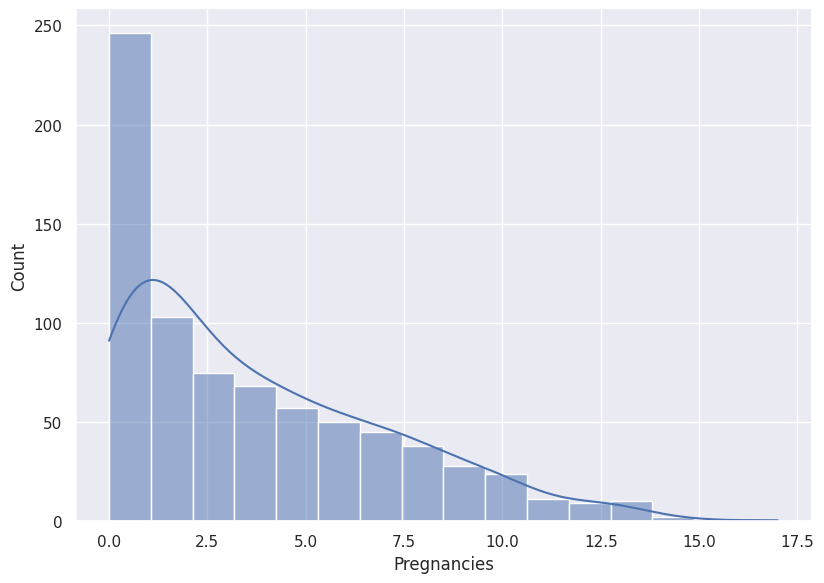

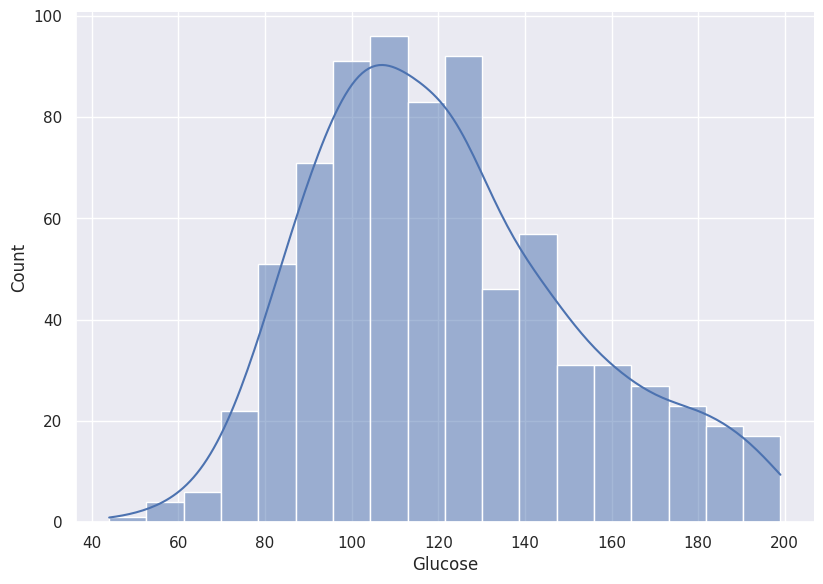

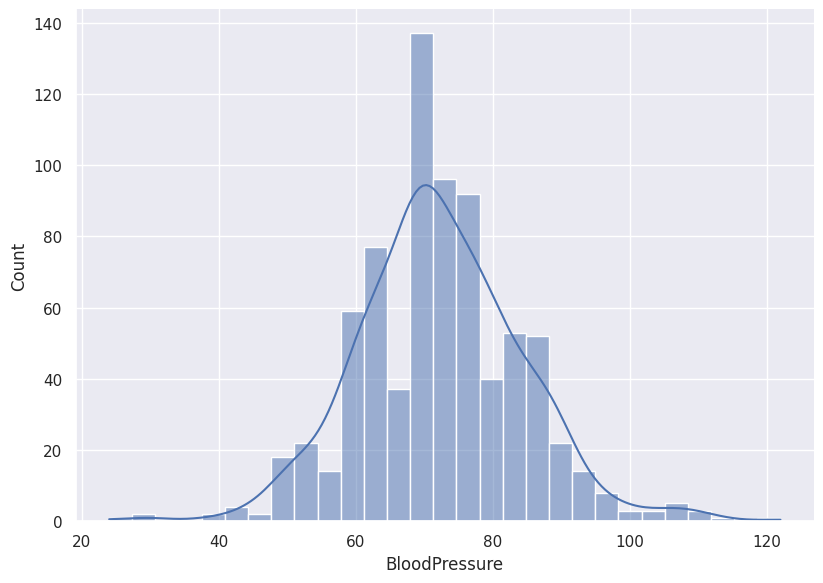

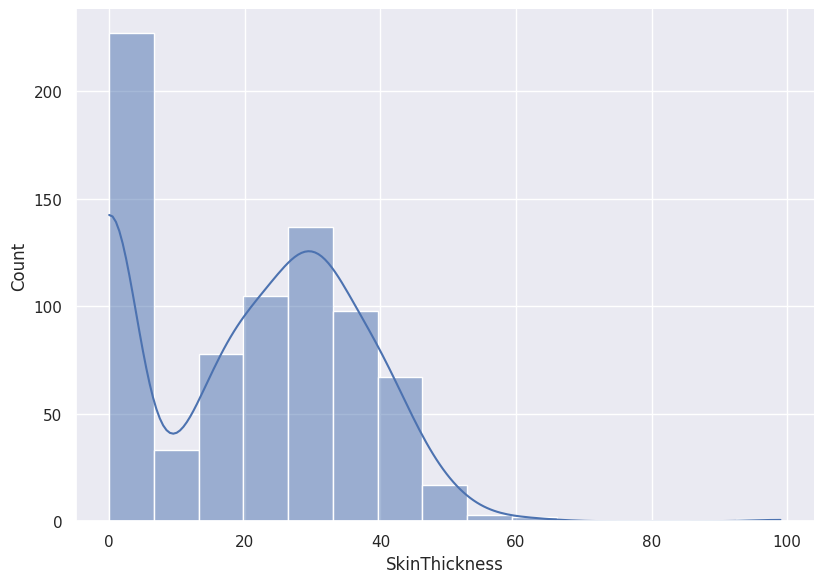

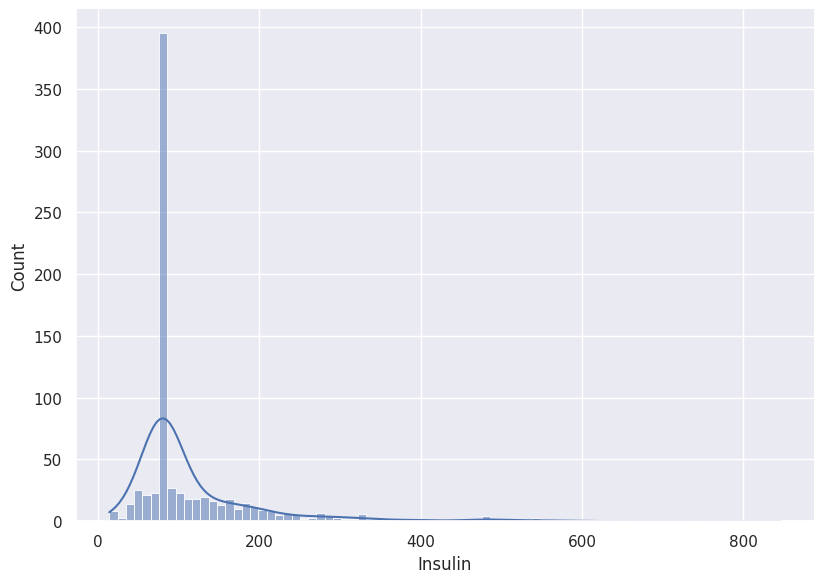

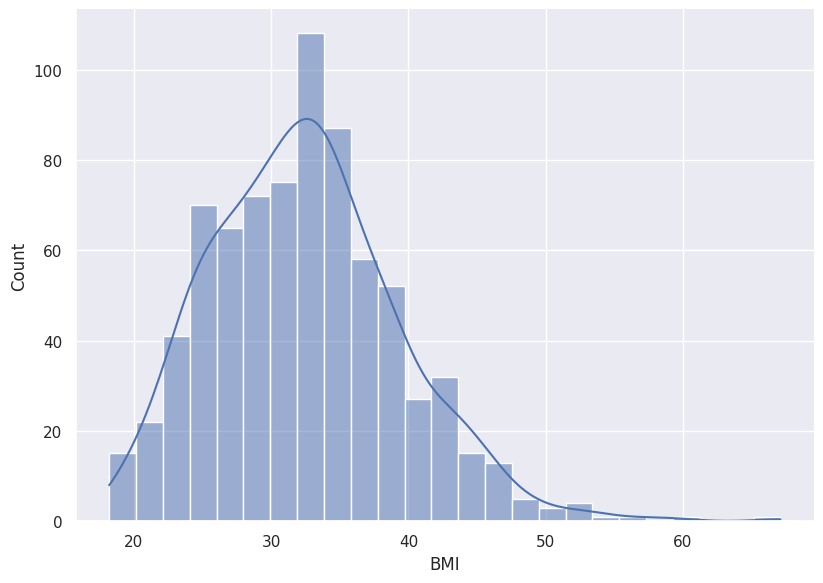

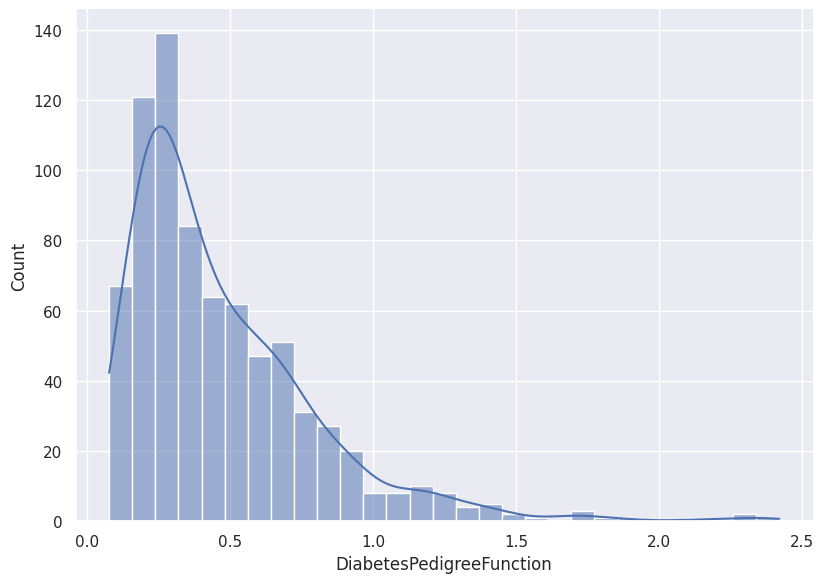

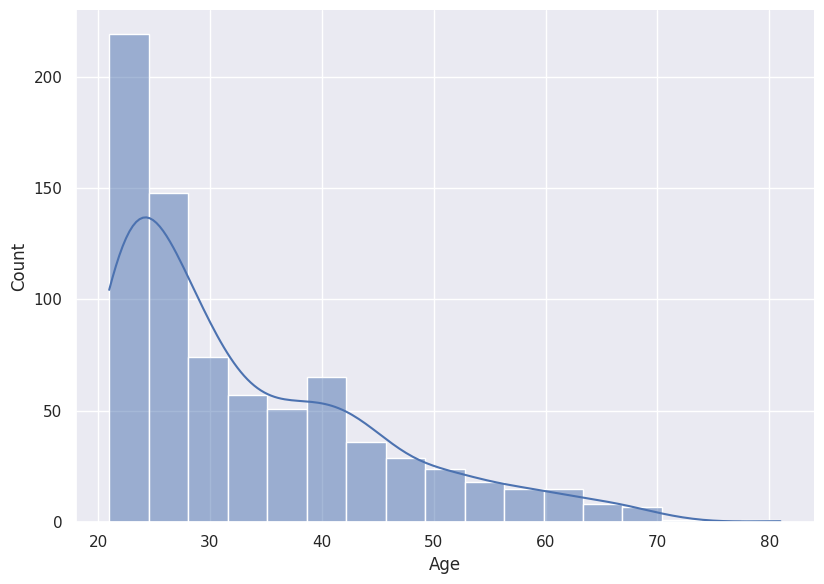

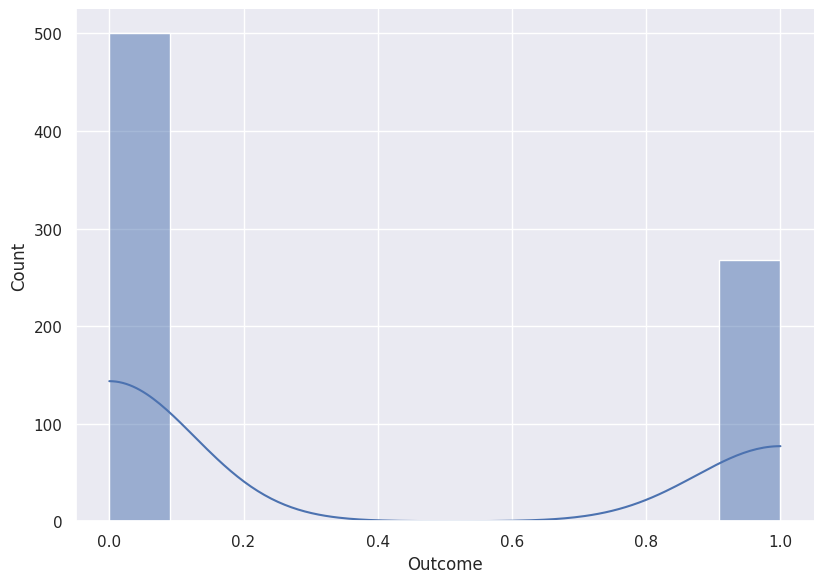

In [ ]:
for col in data.columns:
    sns.displot(data=data[col], kde=True, height=6, aspect=1.4)
    plt.show()

**Na poniższych wykresach pudełkowych można zauważyć, że predyktor Insulin ma najwięcej odstających wartości, tzn. pytanie czy Insulina może być w skrajnych przypadkach na poziomie 800, czy może  należy usunąć np. wartości z zakresu [500, 846]**

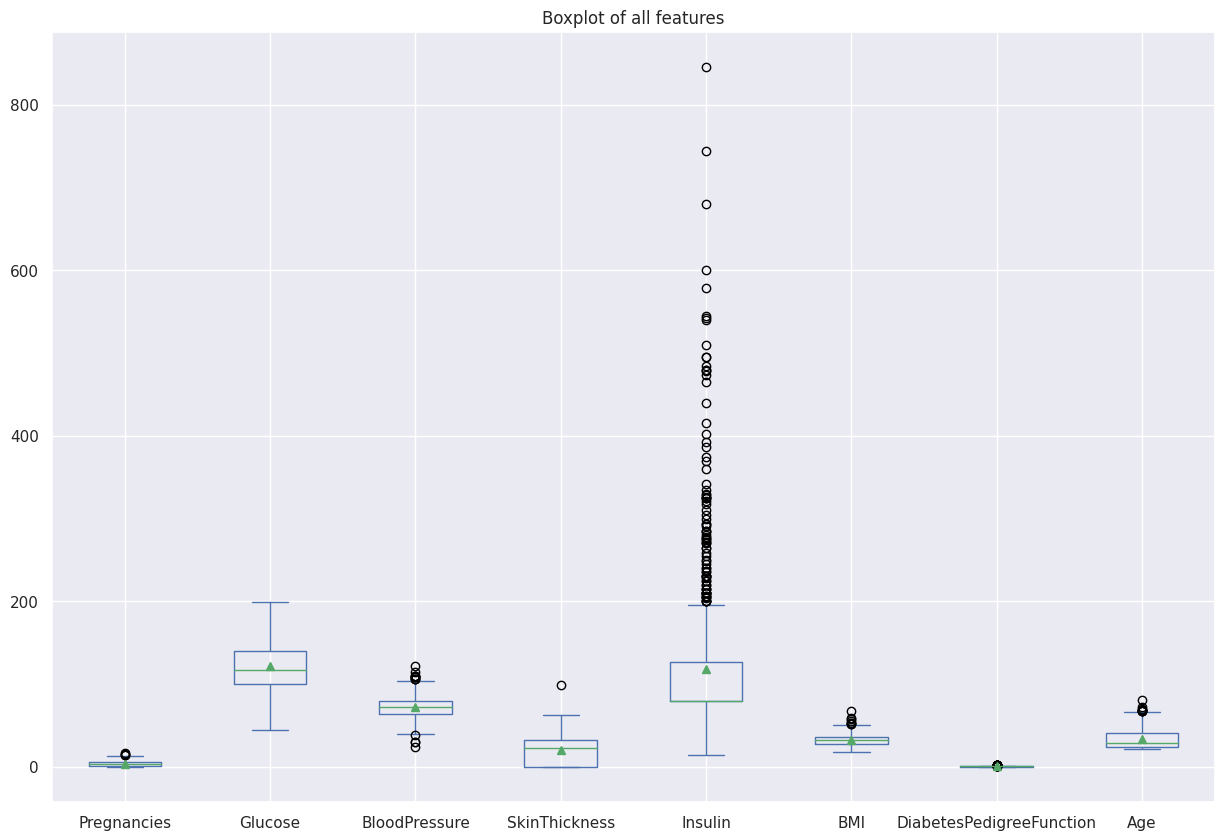

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

In [ ]:
sns.set(rc={'figure.figsize': (15, 10)})
ax = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].plot(kind='box', title='Boxplot of all features', showmeans=True)
plt.show()
plt.figure(figsize=(5, 4))


**Analiza danych** z podziałem na pacjentki mające cukrzycę (1) oraz nie mających cukrzycy (0).
Porównanie zmiennych(predyktorów).
1. Pacjentki z cukrzycą nie mają wartości odstających - **outliers** w przypadku predyktora **Glukozy**, natomiast pacjentki bez cukrzycy mają dość dużo wartości odstających dla zmiennej (predyktora) **Glukoza**

<Axes: xlabel='Outcome', ylabel='Glucose'>

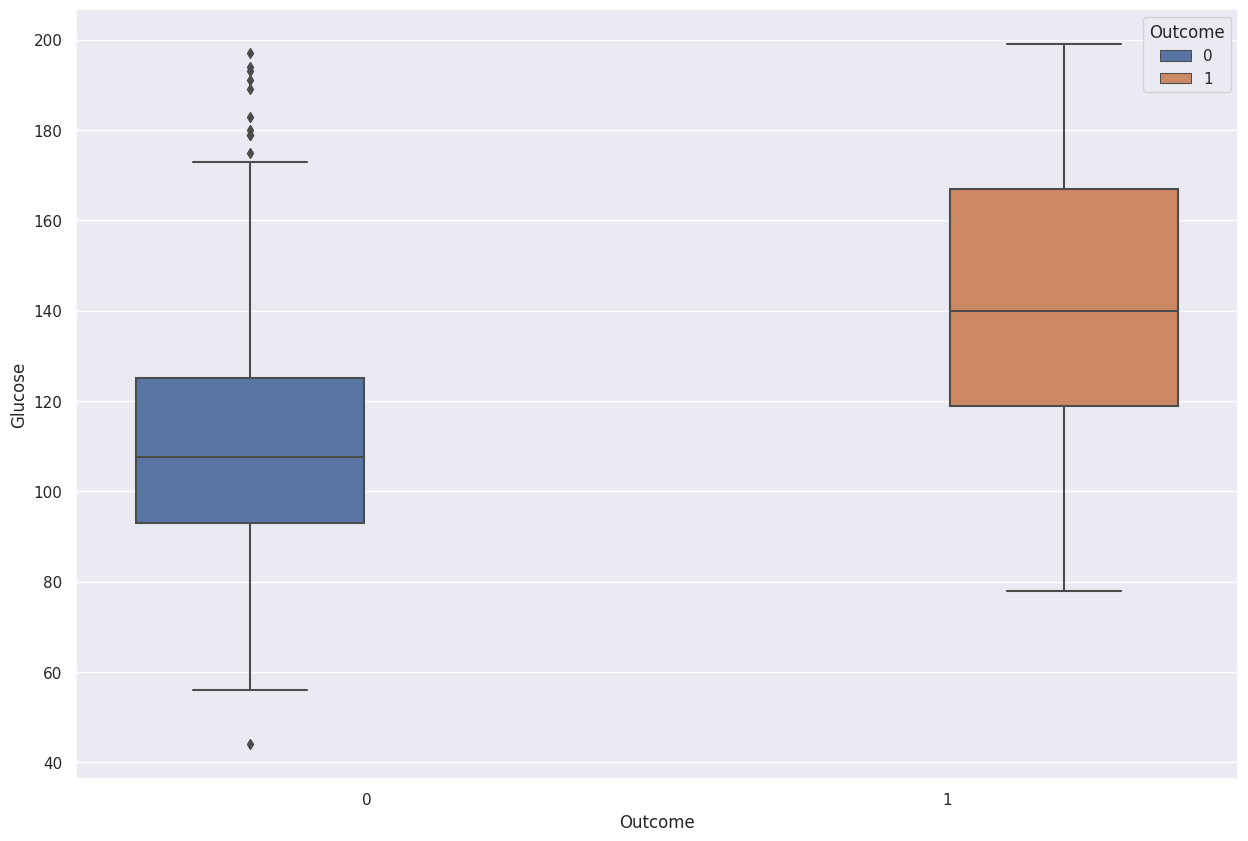

In [ ]:
sns.boxplot(x=data['Outcome'], y=data['Glucose'], hue=data['Outcome'])


Pacjentki bez cukrzycy - statystyka dla Glukozy

In [ ]:
no_diabetic = data[data['Outcome']==0]
no_diabetic['Glucose'].describe()

count    500.000000
mean     110.705367
std       24.715021
min       44.000000
25%       93.000000
50%      107.500000
75%      125.000000
max      197.000000
Name: Glucose, dtype: float64

Pacjentki z cukrzycą - statystyka dla Glukozy

In [ ]:
diabetic = data[data['Outcome']==1]
diabetic['Glucose'].describe()

count    268.000000
mean     142.159661
std       29.545943
min       78.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64

2. Bardzo dużo wartości odstających - **outliers** posiada zmienna **Insulina** zarówno dla pacentek z cukrzycą jak i bez cukrzycy

<Axes: xlabel='Outcome', ylabel='Insulin'>

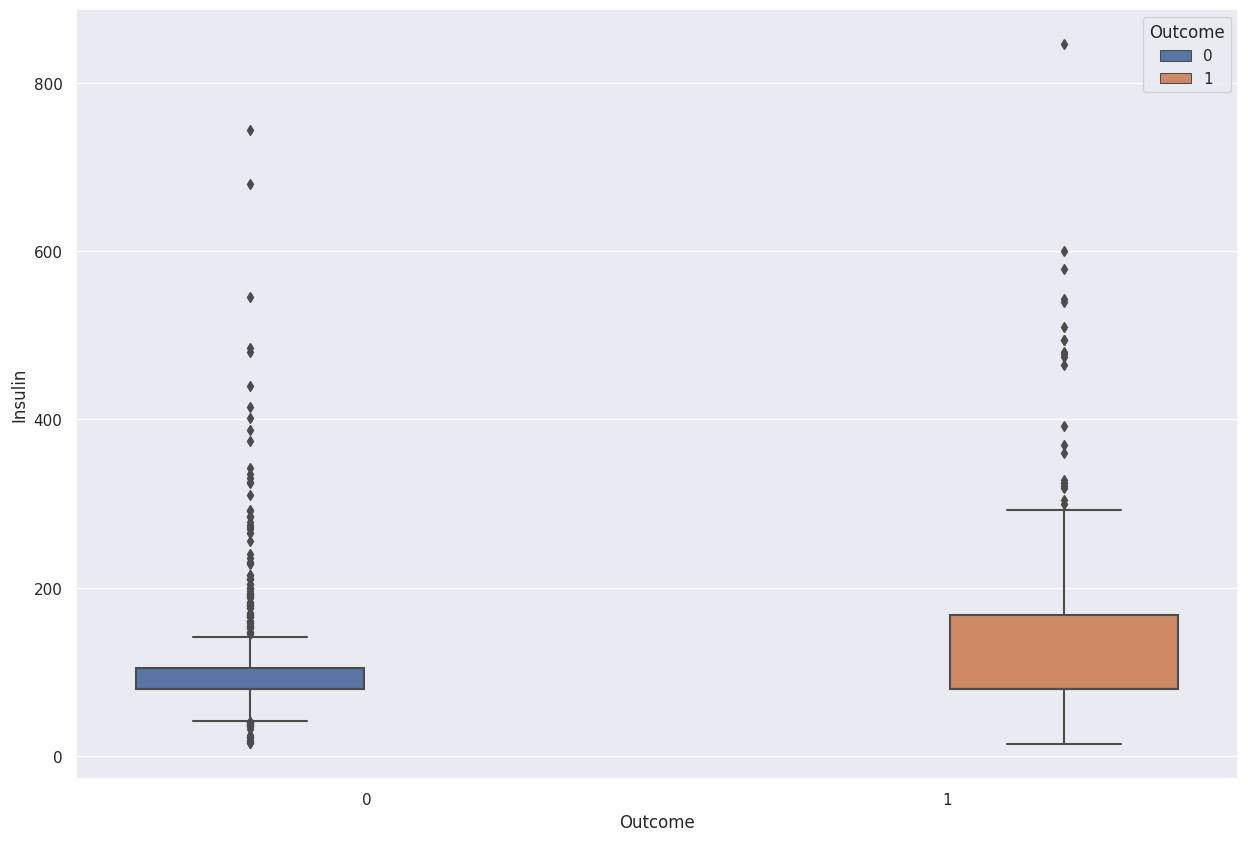

In [ ]:
sns.boxplot(x=data['Outcome'], y=data['Insulin'], hue=data['Outcome'])


3. Występuje kilka wartości odstających - **outliers** dla zmiennej **Ciśnienie krwi** zarówno dla pacentek z cukrzycą jak i bez cukrzycy

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

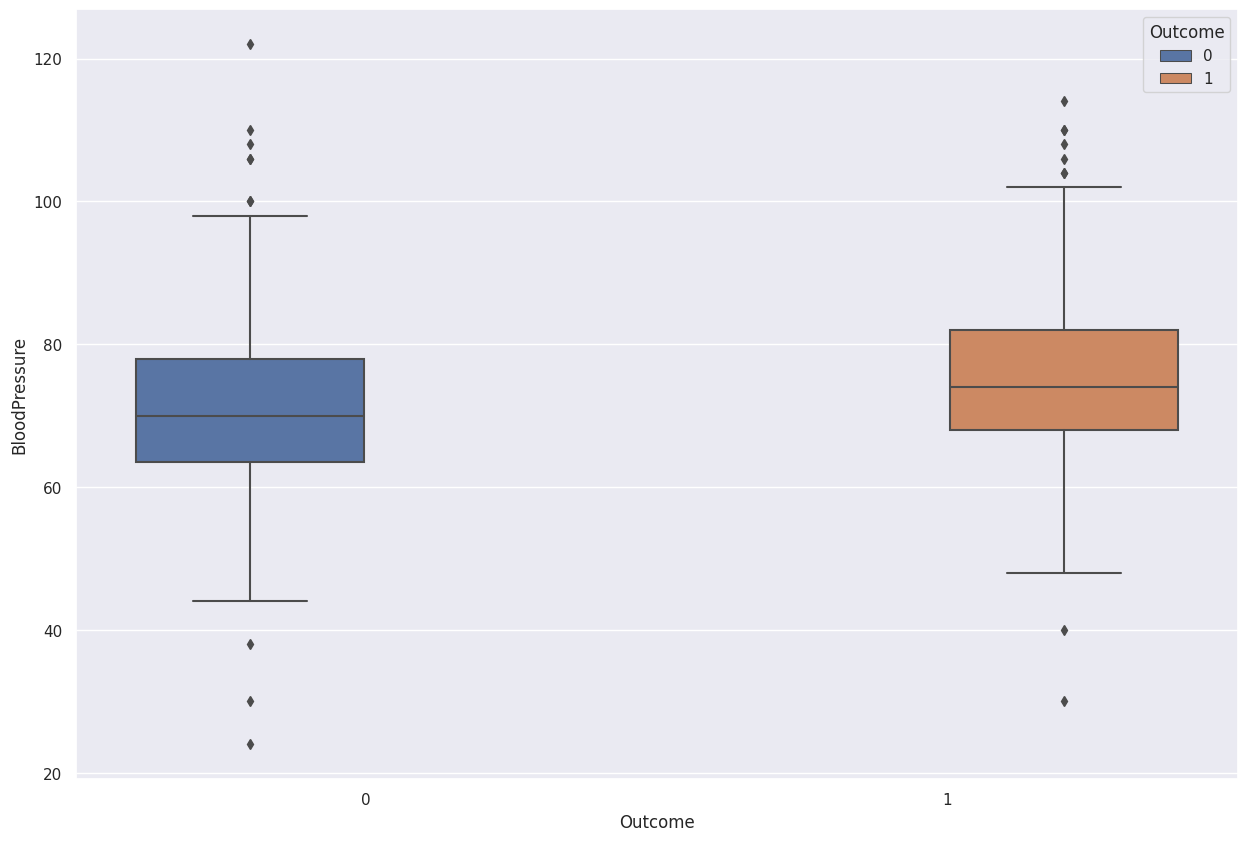

In [ ]:
sns.boxplot(x=data['Outcome'], y=data['BloodPressure'], hue=data['Outcome'])

4. Występuje kilka wartości odstających - **outliers** dla zmiennej **BMI** zarówno dla pacentek z cukrzycą jak i bez cukrzycy

<Axes: xlabel='Outcome', ylabel='BMI'>

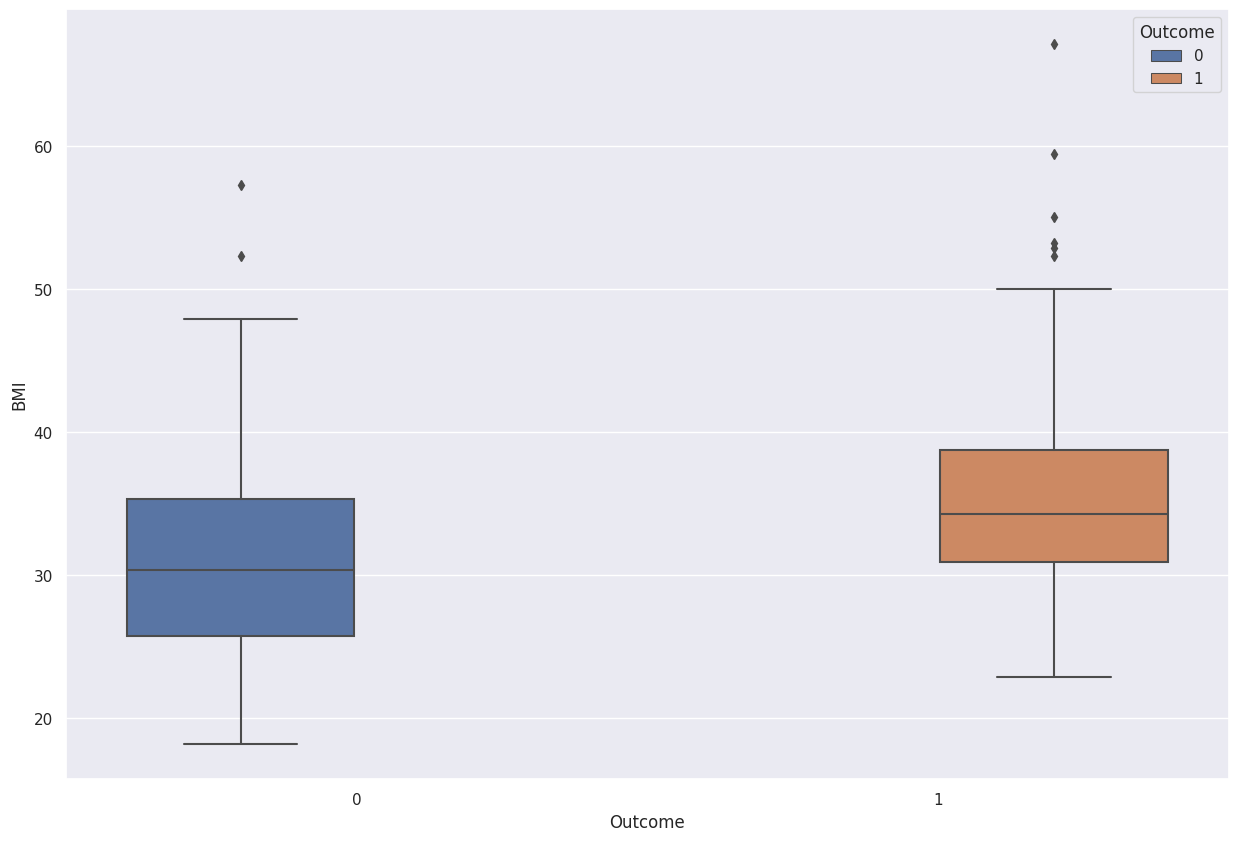

In [ ]:
sns.boxplot(x=data['Outcome'], y=data['BMI'], hue=data['Outcome'])

**Mediana ciśnienia krwi** dla pacjentek z cukrzycą oraz bez cukrzycy

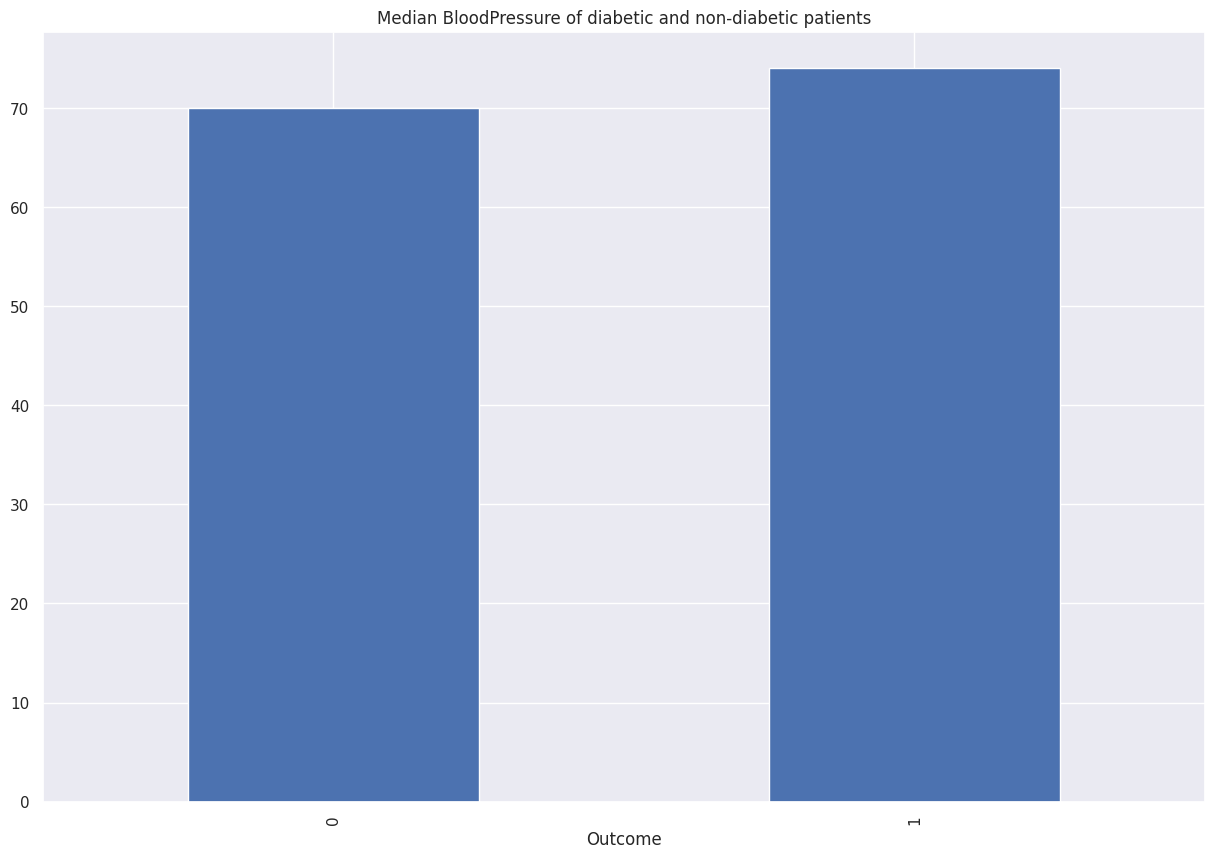

In [ ]:
data.groupby('Outcome')['BloodPressure'].median().plot(kind='bar')
plt.title('Median BloodPressure of diabetic and non-diabetic patients')
plt.show()

**Mediana Glukozy** dla pacjentek z cukrzycą oraz bez cukrzycy

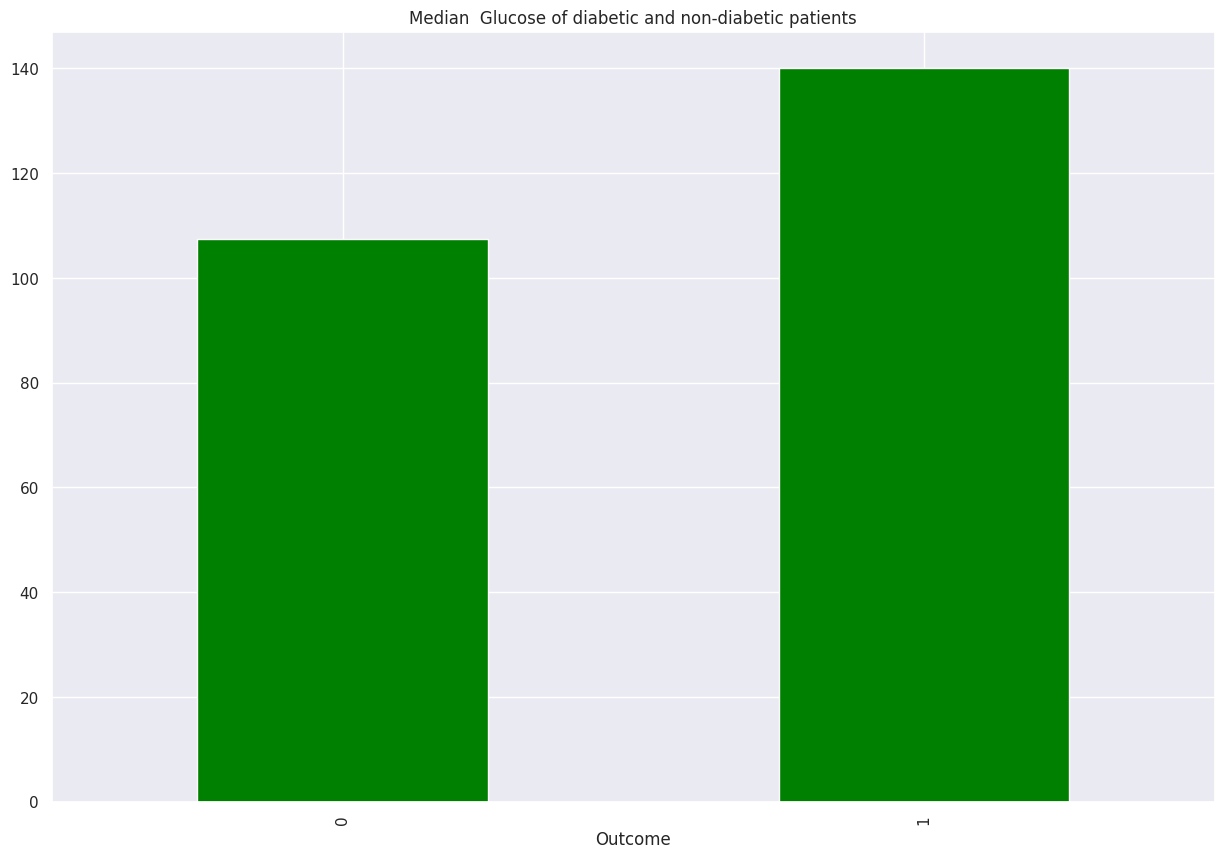

In [ ]:
data.groupby('Outcome')['Glucose'].median().plot(kind='bar', color='green')
plt.title('Median  Glucose of diabetic and non-diabetic patients')
plt.show()

**Mediana Insuliny** dla pacjentek z cukrzycą oraz bez cukrzycy

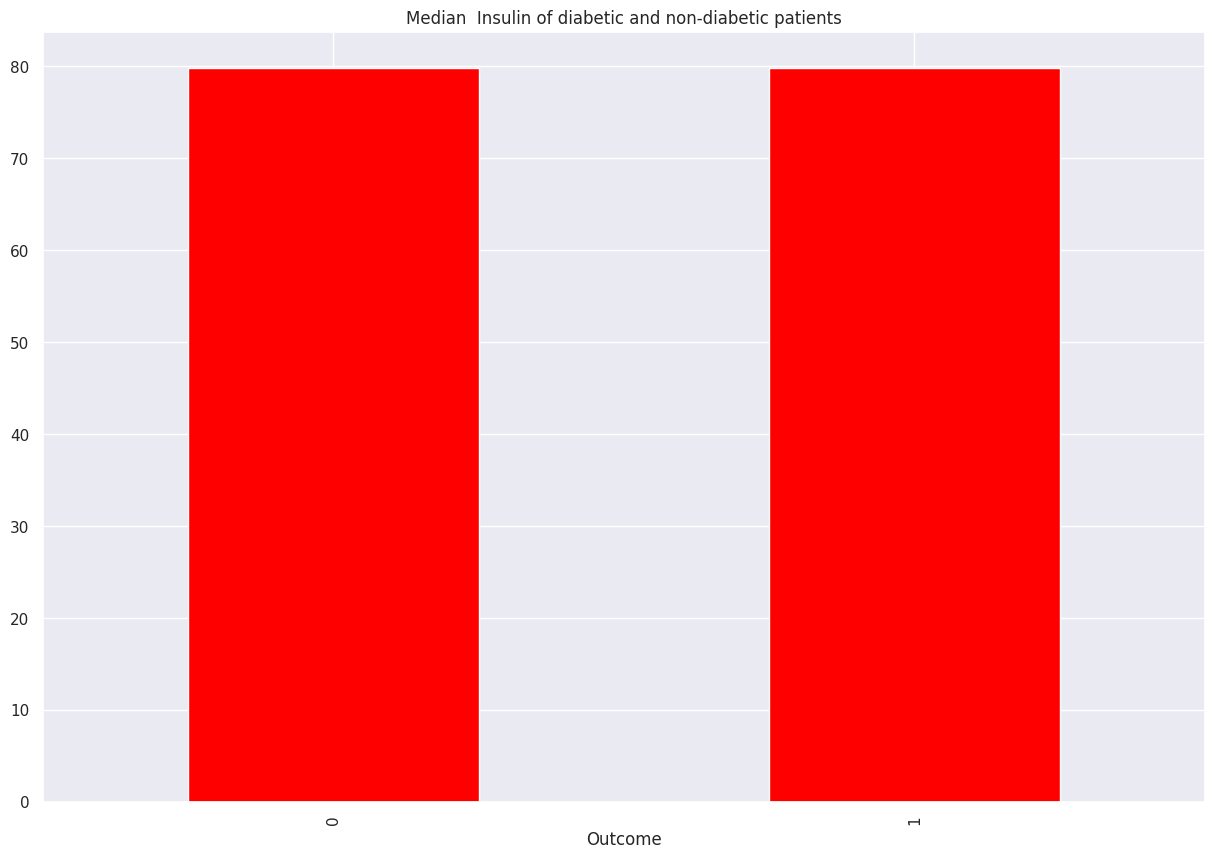

In [ ]:
data.groupby('Outcome')['Insulin'].median().plot(kind='bar', color='red')
plt.title('Median  Insulin of diabetic and non-diabetic patients')
plt.show()

Mediana **wieku** dla pacjentek z cukrzycą oraz bez cukrzycy

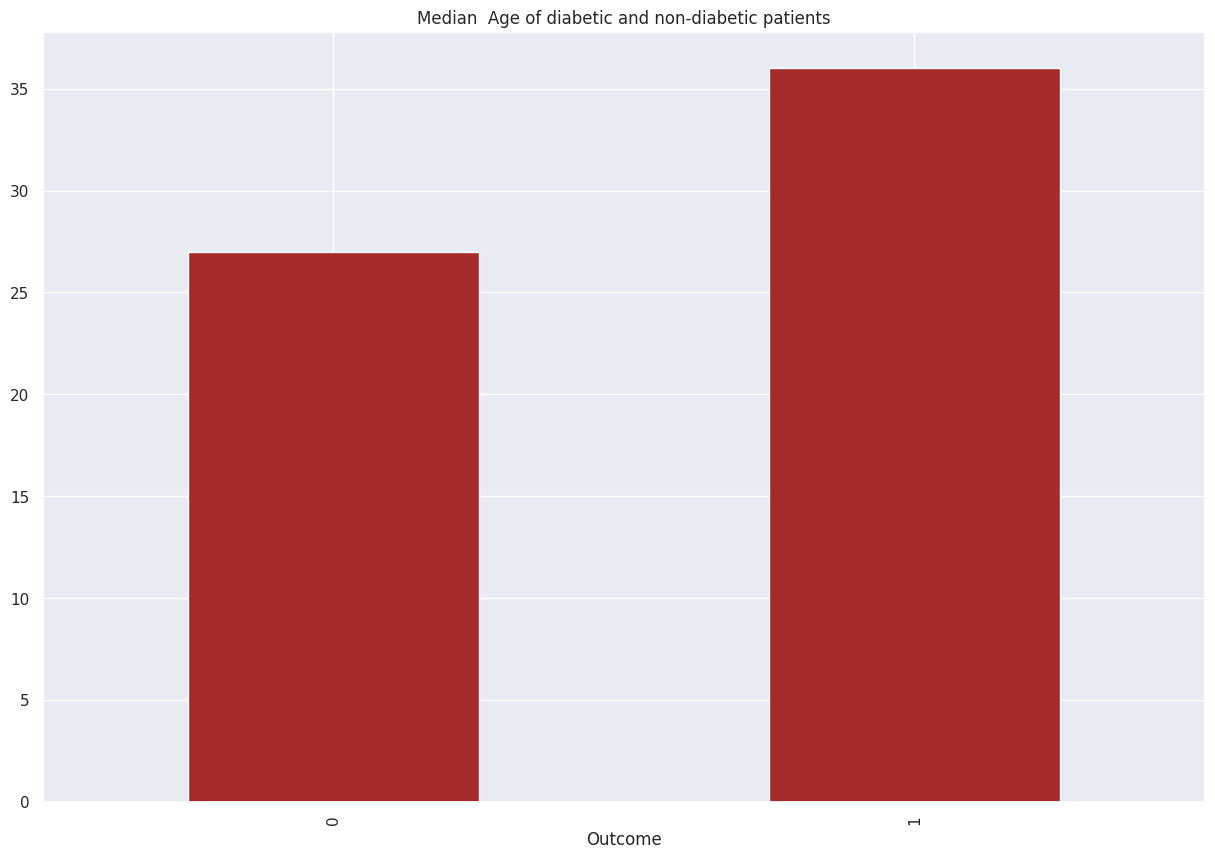

In [ ]:
data.groupby('Outcome')['Age'].median().plot(kind='bar',color ='brown')
plt.title('Median  Age of diabetic and non-diabetic patients')
plt.show()

Średnia **wieku** dla pacjentek z cukrzycą oraz bez cukrzycy

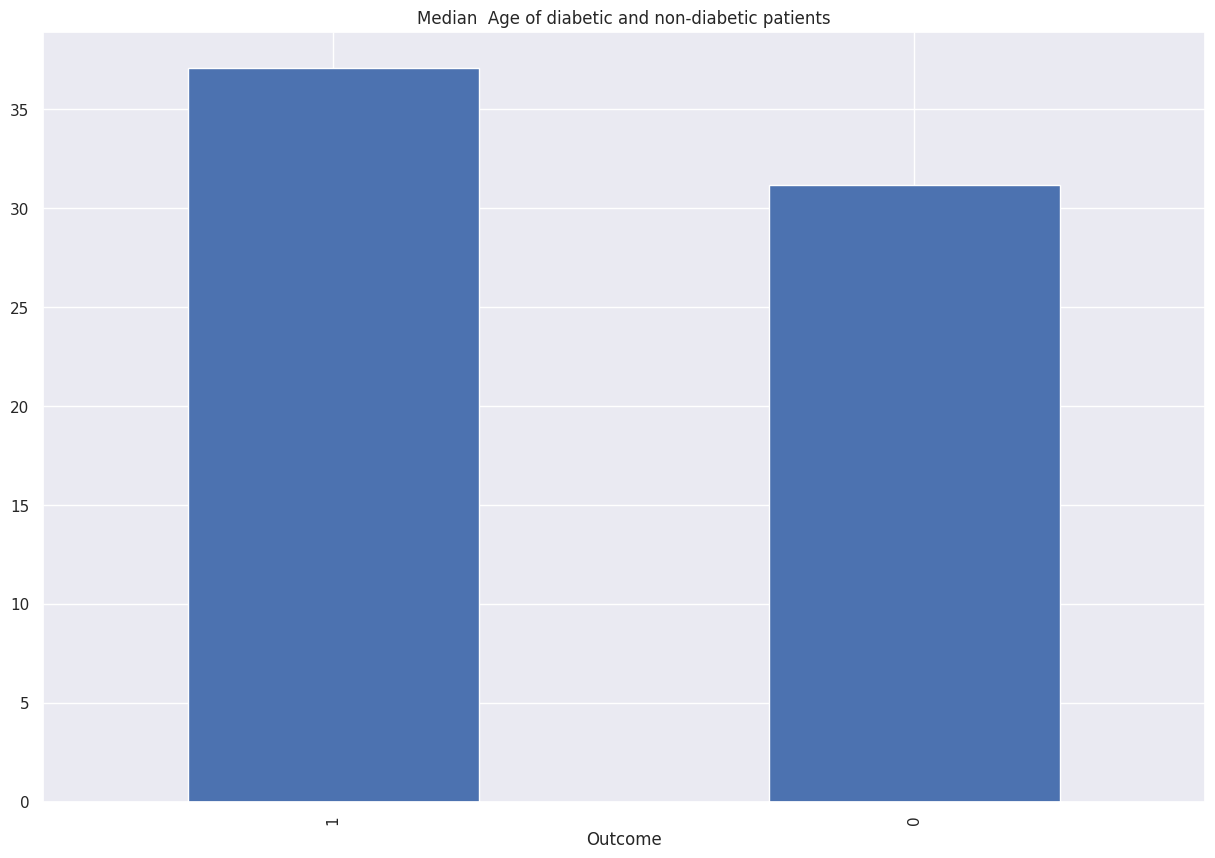

In [ ]:
data.groupby('Outcome')['Age'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Median  Age of diabetic and non-diabetic patients')
plt.show()

In [ ]:
try:
    conn = sqlite3.connect(r'/content/drive/MyDrive/Colab Notebooks/diabetes_db.db')
    data.to_sql('diabetesT', conn, if_exists='replace', index=False)
    cursor=conn.cursor()
    query = "SELECT count(*) FROM diabetesT"

    for row in cursor.execute(query):
        print(row)

    query_outcome = "SELECT AVG(Age) from diabetesT Group By Outcome order by Outcome desc"
    cursor.execute(query_outcome)
    result = cursor.fetchall()
    print(f"Średnia wieku dla pacjentek z cukrzycą i bez cukrzycy: {result}")
except sqlite3.Error as err:
    print("Bład polaczenia", err)

finally:
    conn.close()

(768,)
Średnia wieku dla pacjentek z cukrzycą i bez cukrzycy: [(37.06716417910448,), (31.19,)]


In [ ]:
data.groupby('Outcome').agg(['mean', 'min','max','median'],axis=0)


Pregnancies                    Glucose                      \
               mean min max median        mean   min    max median   
Outcome                                                              
0          3.298000   0  13    2.0  110.705367  44.0  197.0  107.5   
1          4.865672   0  17    4.0  142.159661  78.0  199.0  140.0   

        BloodPressure        ...   BMI        DiabetesPedigreeFunction         \
                 mean   min  ...   max median                     mean    min   
Outcome                      ...                                                
0           70.810008  24.0  ...  57.3  30.40                 0.429734  0.078   
1           74.950326  30.0  ...  67.1  34.25                 0.550500  0.088   

                             Age                 
           max median       mean min max median  
Outcome                                          
0        2.329  0.336  31.190000  21  81   27.0  
1        2.420  0.449  37.067164  21  70   36.0  

[2 rows x 32 columns]

Tablica korelacji pomiedzy wszystkimi zmiennymi (predyktorami) oraz zmienną celu.

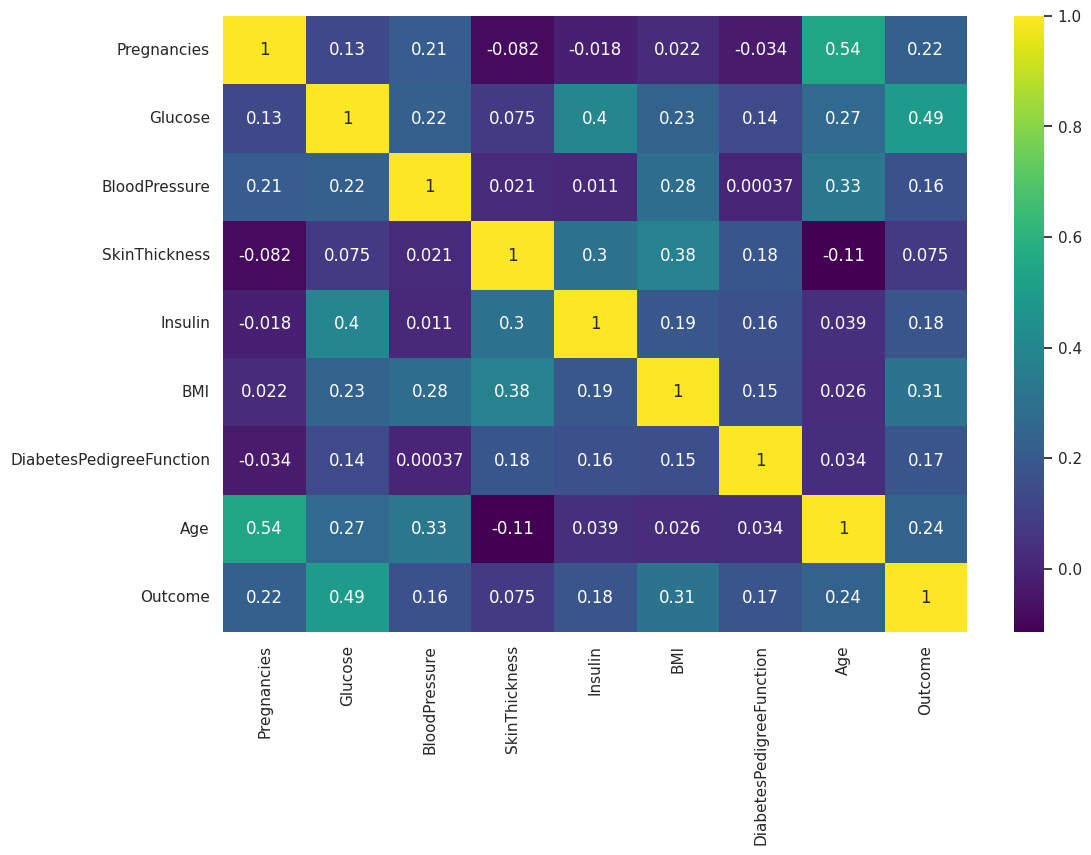

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

**2. Przygotowanie danych:**

**Usunięcie brakujących danych**

Brak wartości null dla każdej zmiennej

In [ ]:
missing_values = data.isnull().sum()
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**3. Podział danych:**

**Podział danych na zbiór treningowy i testowy**
80% - zbiór treningowy, 20% - zbiór testowy

In [ ]:
X = data.drop(['Outcome'], axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
383,1,90.0,62.000000,18,59.000000,25.1,1.268,25
465,0,124.0,56.000000,13,105.000000,21.8,0.452,21
466,0,74.0,52.000000,10,36.000000,27.8,0.269,22
467,0,97.0,64.000000,36,100.000000,36.8,0.600,25
469,6,154.0,78.000000,41,140.000000,46.1,0.571,27
...,...,...,...,...,...,...,...,...
193,11,135.0,69.105469,0,79.799479,52.3,0.578,40
485,0,135.0,68.000000,42,250.000000,42.3,0.365,24
484,0,145.0,69.105469,0,79.799479,44.2,0.630,31
186,8,181.0,68.000000,36,495.000000,30.1,0.615,60


In [ ]:
columns = X.columns
y = data['Outcome']
y

383    0
465    0
466    0
467    0
469    0
      ..
193    1
485    1
484    1
186    1
0      1
Name: Outcome, Length: 768, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.shape

(154, 8)

**Standaryzacja i normalizacja danych**
Dla każdej kolumny - zmiennej estymujemy-przybliżamy  średnią do wartości 0 oraz odchylenie standardowe do wartości  1 (standaryzacja za pomocą rozkładu normalnego N(0;1))

In [ ]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
data.head(8)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 383 to 0
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 60.0 KB


In [ ]:
#wyświetlenie metryki std dla pierwszej kolumny zbioru testowego
X_1 = X_test[:,0]
X_1.std()

0.9149121014562446

Po standaryzacji danych

In [ ]:
def after_standard(data_set):
    shape  = data_set.shape
    for i in range(0,shape[1]):
        print(f"Kolumna {i + 1} Średnia: {str(data_set[:,i].mean())}, Odchylenie standardowe: {str(data_set[:,i].std())}")

Metryki po standaryzacji dla zbioru uczącego się

In [ ]:
after_standard(X_train)

Kolumna 1 Średnia: -5.786178629968243e-17, Odchylenie standardowe: 1.0
Kolumna 2 Średnia: 4.484288438225388e-17, Odchylenie standardowe: 1.0
Kolumna 3 Średnia: -5.062906301222212e-17, Odchylenie standardowe: 1.0
Kolumna 4 Średnia: -3.471707177980945e-17, Odchylenie standardowe: 1.0
Kolumna 5 Średnia: -2.0830243067885673e-16, Odchylenie standardowe: 1.0
Kolumna 6 Średnia: -3.298121819081898e-16, Odchylenie standardowe: 1.0
Kolumna 7 Średnia: 8.679267944952363e-18, Odchylenie standardowe: 0.9999999999999999
Kolumna 8 Średnia: -5.786178629968243e-17, Odchylenie standardowe: 1.0


Metryki po standaryzacji dla zbioru testowego

In [ ]:
after_standard(X_test)

Kolumna 1 Średnia: -0.07627721259619884, Odchylenie standardowe: 0.9149121014562446
Kolumna 2 Średnia: -0.061124176001368054, Odchylenie standardowe: 0.9258421378421647
Kolumna 3 Średnia: -0.003943548231118919, Odchylenie standardowe: 1.0508062620046938
Kolumna 4 Średnia: 0.027421838048404944, Odchylenie standardowe: 1.0398862243517346
Kolumna 5 Średnia: 0.029871602590369164, Odchylenie standardowe: 1.0172167121756723
Kolumna 6 Średnia: 0.04699567062082496, Odchylenie standardowe: 1.0472749784131712
Kolumna 7 Średnia: -0.13979734209085076, Odchylenie standardowe: 0.7455130558155378
Kolumna 8 Średnia: -0.03572156829170243, Odchylenie standardowe: 1.0560187866190724


**4. Budowanie modelu:**


**Wybór algorytmu uczenia maszynowego i definiowanie siatek parametrów**


Używamy 4 algorytmów z odpowiednimi hiperparametrami dla tego datasetu w celu nauczania - rozpoznajemy problem **klasyfikacji binarnej**.

1.   Drzewo decyzyjne
2.   Regresja logistyczna
3.   Las losowy
4.   Maszyny wektorów nośnych SVM


In [ ]:
models = {
    'Decision Tree': {
      'model':  DecisionTreeClassifier(),
      'params': {
          'max_leaf_nodes': list(range(2, 100)),
          'min_samples_split': [2, 3, 4]
      }
    },

    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [0.1, 1.0, 10],
            'penalty': ['l1']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1.0, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

**Trenowanie modeli, optymalizacja hiperparametrów, ewaluacja i cross -validation**


In [ ]:
for name, model in models.items():
    grid_search = GridSearchCV(model['model'], model['params'], cv=5)
    grid_search.fit(X_train, y_train)
    print(f"Model: {name} - Najlepsze parametry: {grid_search.best_params_}, Najlepszy wynik: {grid_search.best_score_}")

Model: Decision Tree - Najlepsze parametry: {'max_leaf_nodes': 5, 'min_samples_split': 2}, Najlepszy wynik: 0.7589630814340931
Model: Logistic Regression - Najlepsze parametry: {'C': 0.1, 'penalty': 'l1'}, Najlepszy wynik: 0.7704118352658936
Model: Random Forest - Najlepsze parametry: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 100}, Najlepszy wynik: 0.7605890976942555
Model: SVM - Najlepsze parametry: {'C': 0.1, 'kernel': 'linear'}, Najlepszy wynik: 0.7687458349993337


**Logistic regression with class_weight="balanced"**

Ma to na celu rozwiązanie problemu, że klasy nie są zrównoważone (tj. w tym zbiorze danych jest 35% osób z cukrzycą i 65% osób bez cukrzycy).
Ponieważ nie jest to 50/50, niezrównoważone klasy mogą dawać słabe wyniki przewidywania.
Wdrożenie zrównoważonej wagi spowoduje zmianę przewidywanej granicy klasy.

Maksymalna wartość recall: 0.74, dla C: 0.1


<ipython-input-696-3a62fcd59cc7>:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(C_values, recall_scores, 'ro-', color = 'brown')


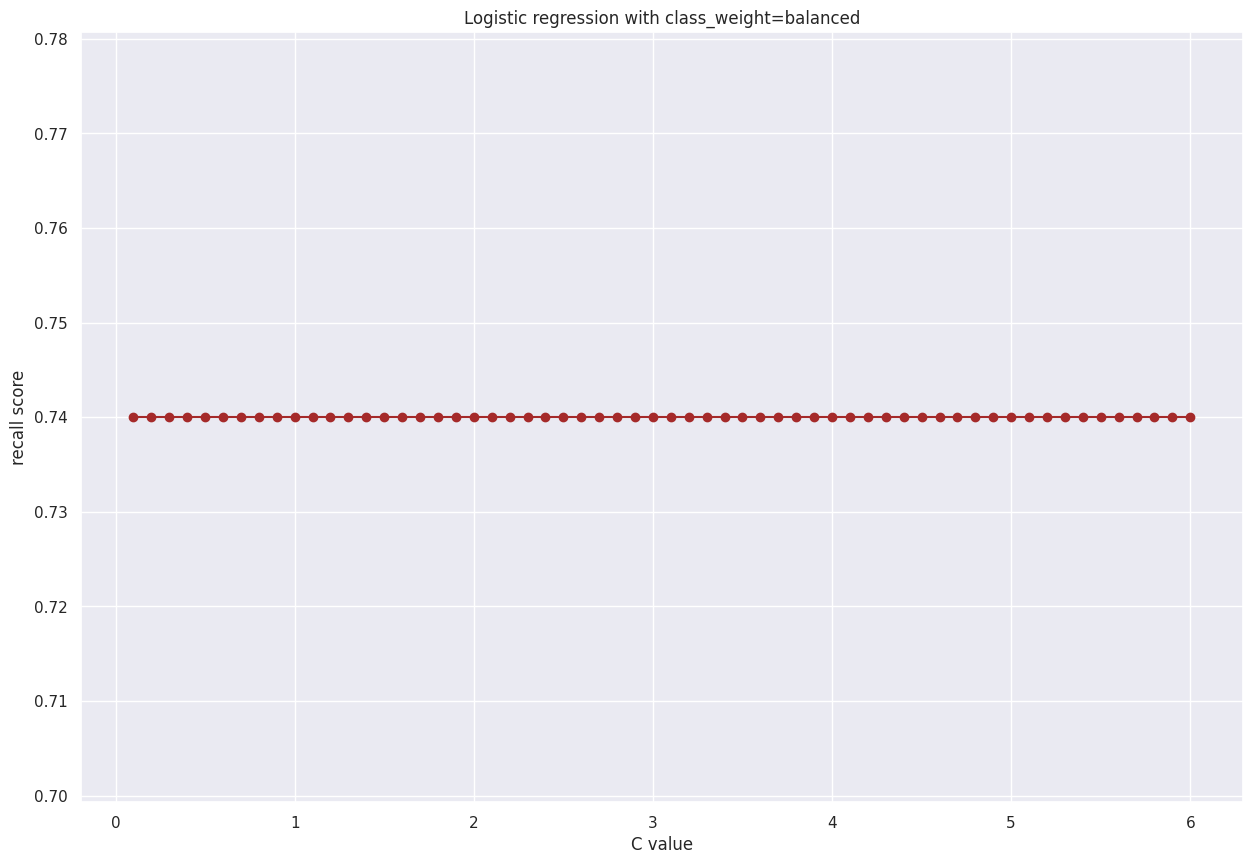

In [ ]:
C_i = 0.1
C_end = 6
C_step = 0.1

C_values, recall_scores = [], []
recall_scores_pom = 0

best_recall_score = float(0)
while (C_i < C_end):
    C_values.append(C_i)
#różnica w porównaniu z oryginalnym modelem regresji logistycznej polega na tym, że poniższy wiersz zawiera „class_weight='balanced'”
    lr_model_loop = LogisticRegression(C=C_i, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    y_pred = lr_model_loop.predict(X_test)
    recall_scores_pom = recall_score(y_test, y_pred)
    recall_scores.append(recall_scores_pom)

    if (recall_scores_pom > best_recall_score):
        best_recall_score = recall_scores_pom
        best_lr_predict_test = y_pred

    C_i = C_i + C_step

best_score_C_i = C_values[recall_scores.index(best_recall_score)]
print(f"Maksymalna wartość recall: {best_recall_score.round(3)}, dla C: {best_score_C_i}")

plt.plot(C_values, recall_scores, 'ro-', color = 'brown')
plt.xlabel("C value")
plt.ylabel("recall score")
plt.title("Logistic regression with class_weight=balanced")
plt.show()


**5. Ocena modelu:**
**Wybór najlepszego modelu**


In [ ]:
# best_model = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200)
best_model = LogisticRegression(C=1.0, penalty = 'l1', solver='liblinear')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

**Ocena jakości modelu na zbiorze testowym**


Metryki klasyfikacji binarnej:

1.   **Dokładność - Accuracy**

Dokładność to liczba poprawnie przewidzianych obserwacji ze wszystkich przewidywanych obserwacji.

**Accuracy = (TP + TN)/(TP + TN + FP + FN)**

2.   **Precyzja - Precision**

Precyzja próbuje odpowiedzieć na to pytanie:
Jaki odsetek ocen pozytywnych był w tym przypadku prawidłowy?

**Precision = TP/(TP + FP)**

3. **Czułość - Recall**

Recall to stosunek całkowitej liczby poprawnie sklasyfikowanych klas pozytywnych do całkowitej liczby klas pozytywnych

**Recall = TP/(TP + FN)**

Recall to przydatna miara w przypadkach, w których FN > FP.

Przykład: załóżmy, że osoba ma raka (lub nie) albo wirusa lub nie ? On cierpi na raka, ale model przewiduje, że nie cierpi na raka - (FN)
*********************************************************************
Gdzie TP = prawdziwe pozytywnie, TN = prawdziwe negatywnie, FP = fałszywie pozytywne, FN = fałszywie negatywne.

**Innymi słowy:**

**TP** jest to suma zliczeń, w których zarówno przewidywane, jak i rzeczywiste wartości to Outcome = 1, czyli model na zestawie testowym prawidłowo wykrył pacjentki z cukrzycą.

**TN** jest to suma zliczeń, w których zarówno przewidywane, jak i rzeczywiste wartości dają wyniki Outcome = 0, czyli model prawidłowo zweryfikował, przewidział pacjentki bez cukrzycy.

**FP** jest to suma zliczeń, które przewidywały, że pacjentki mają cukrzycę (Outcome=1), podczas gdy w rzeczywistości pacjentki nie mają cukrzycy (Outcome=0).

**FN** jest to suma zliczeń, dla których prognoza nie jest pacjentką z cukrzycą, podczas gdy w rzeczywistości pacjentki mają cukrzycę.

**Zawsze mierzone tylko na danych testowych !!!**

Dokładność mierzona  na niezrównoważonym zbiorze danych nie daje miarodajnych - w pełni prawidłowych wyników.

**Zrównoważony - zbalansowany zbiór danych testowych** (ilosć pozytywnych etykiet zmiennej celu w przyblizeniu równa się iości negatywnych etykiet zmiennej celu - Outcome, tzn. ilość obserwacji z cukrzycą w przyblizeniu równa się ilości obesrwacji bez cukrzycy). W naszym przypadku występuje rozbieżność 268 a 500 (35%/65%)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7857142857142857


In [ ]:
precision  = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

Precision: 0.7073170731707317


In [ ]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

Recall: 0.58


**Macież pomyłek**
Macierz pomyłek to macierz, która podsumowuje wydajność modelu uczenia maszynowego na zestawie danych testowych. Jest często używany do mierzenia wydajności modeli klasyfikacji, których celem jest przewidywanie kategorycznej etykiety dla każdej instancji wejściowej.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[92, 12],
       [21, 29]])

TP = 29, TN = 92, FP = 12, FN = 21

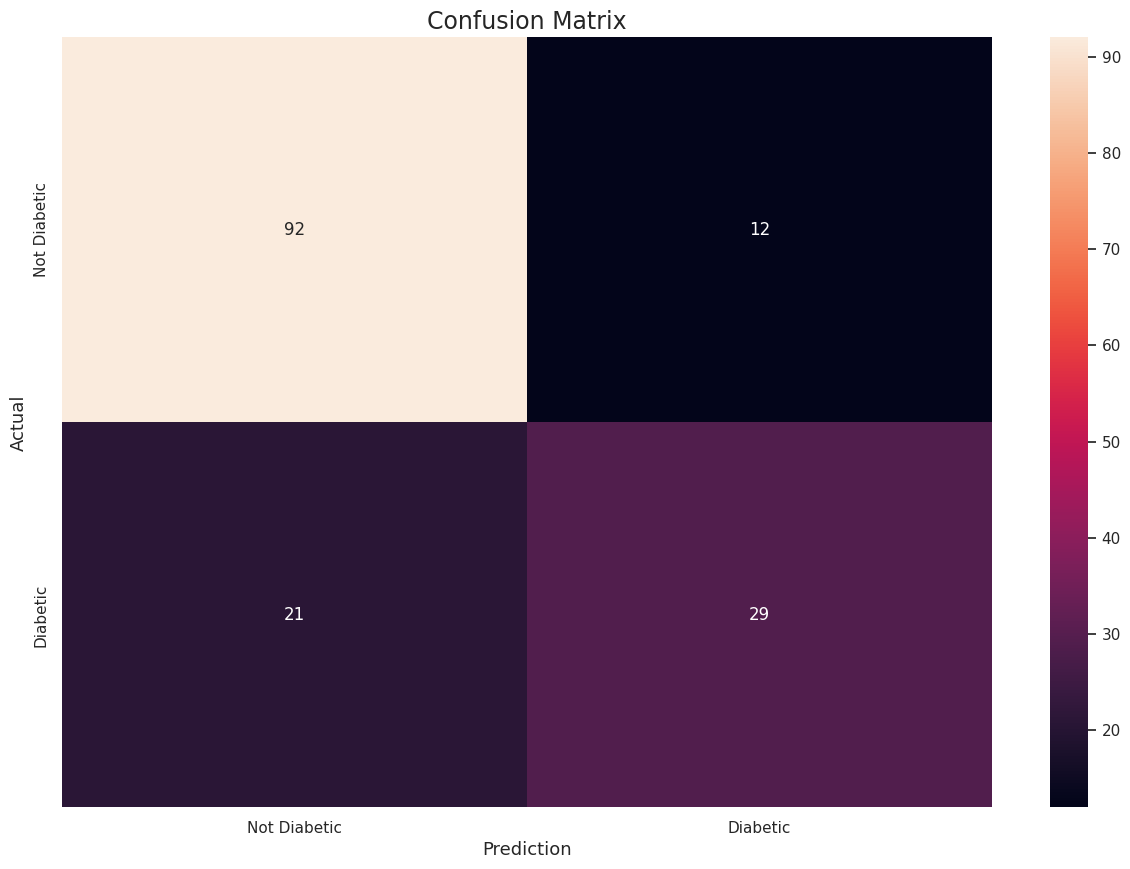

In [ ]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Not Diabetic','Diabetic'],
            yticklabels=['Not Diabetic','Diabetic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**Raport klasyfikacji**

154 - ilość obserwacji w zbiorze testowym (20% * 768)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       104
           1       0.71      0.58      0.64        50

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



**Wnioski**

Zbiór diabetes.csv jest dość mały i niezbalansowany-niezrównoważony, co ma wpływ na wyniki nauczania i dobór najlepszego algorytmu.
Na podstawie powyższej analizy nalepszym modelem klasyfikacyjnym - binarnym do przewidywania czy pacjentka ma cukrzycę czy nie to: Regresja logistyczna.